# Linear Regression Assignment - 24/02/2019 

## Car Price Prediction Case Study
### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1)	Which variables are significant in predicting the price of a car

2)	How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns=None

In [3]:
#For Feature scaling
from sklearn.preprocessing import MinMaxScaler
#For spliting data into traning set and test set 
from sklearn.model_selection import train_test_split
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Linear regression model from statsmodel
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Step 1: Reading and Understanding the Data

In [4]:
car_master_df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
car_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car_master_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Split the 'CarName' column to get the name of the car company and create a new column 'compname'
car_master_df['compname']=car_master_df['CarName'].str.split(' ').str[0]

In [8]:
car_master_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,compname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Cleaning data - correcting the spelling of company names

In [9]:
car_master_df.loc[car_master_df['compname']=='maxda','compname']='mazda'
car_master_df.loc[car_master_df['compname']=='Nissan','compname']='nissan'
car_master_df.loc[car_master_df['compname']=='porcshce','compname']='porsche'
car_master_df.loc[car_master_df['compname']=='toyouta','compname']='toyota'
car_master_df.loc[car_master_df['compname']=='vokswagen','compname']='volkswagen'
car_master_df.loc[car_master_df['compname']=='vw','compname']='volkswagen'

In [10]:
car_master_df['compname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
#Independent variables:
#Categorical : Symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype, cylindernumber, fuelsystem
#Numeric : wheelbase,carlength, carwidth, carheight, curbweight, enginesize, boreratio,stroke,compressionratio,horsepower,peakrpm,citympg, highwaympg, 

#Dependent variable: 
#Numeric: price

### Step 2: Visualising the Data

#### Visualising Numeric Variables

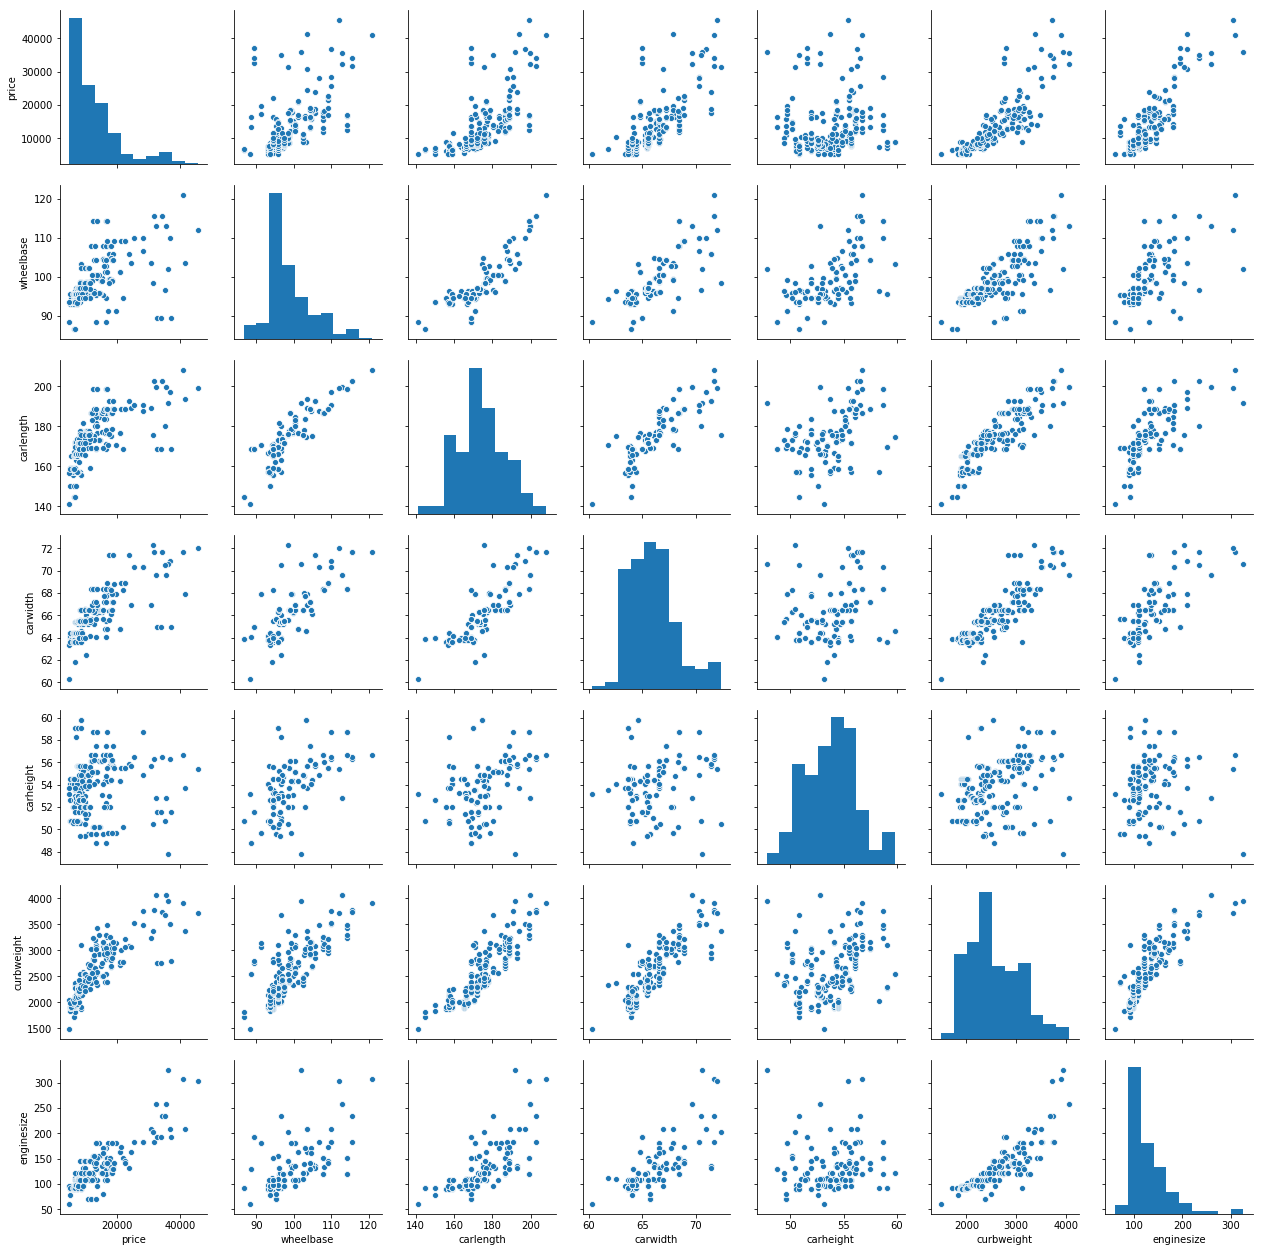

In [12]:
sns.pairplot(data = car_master_df, vars=['price', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize'] )

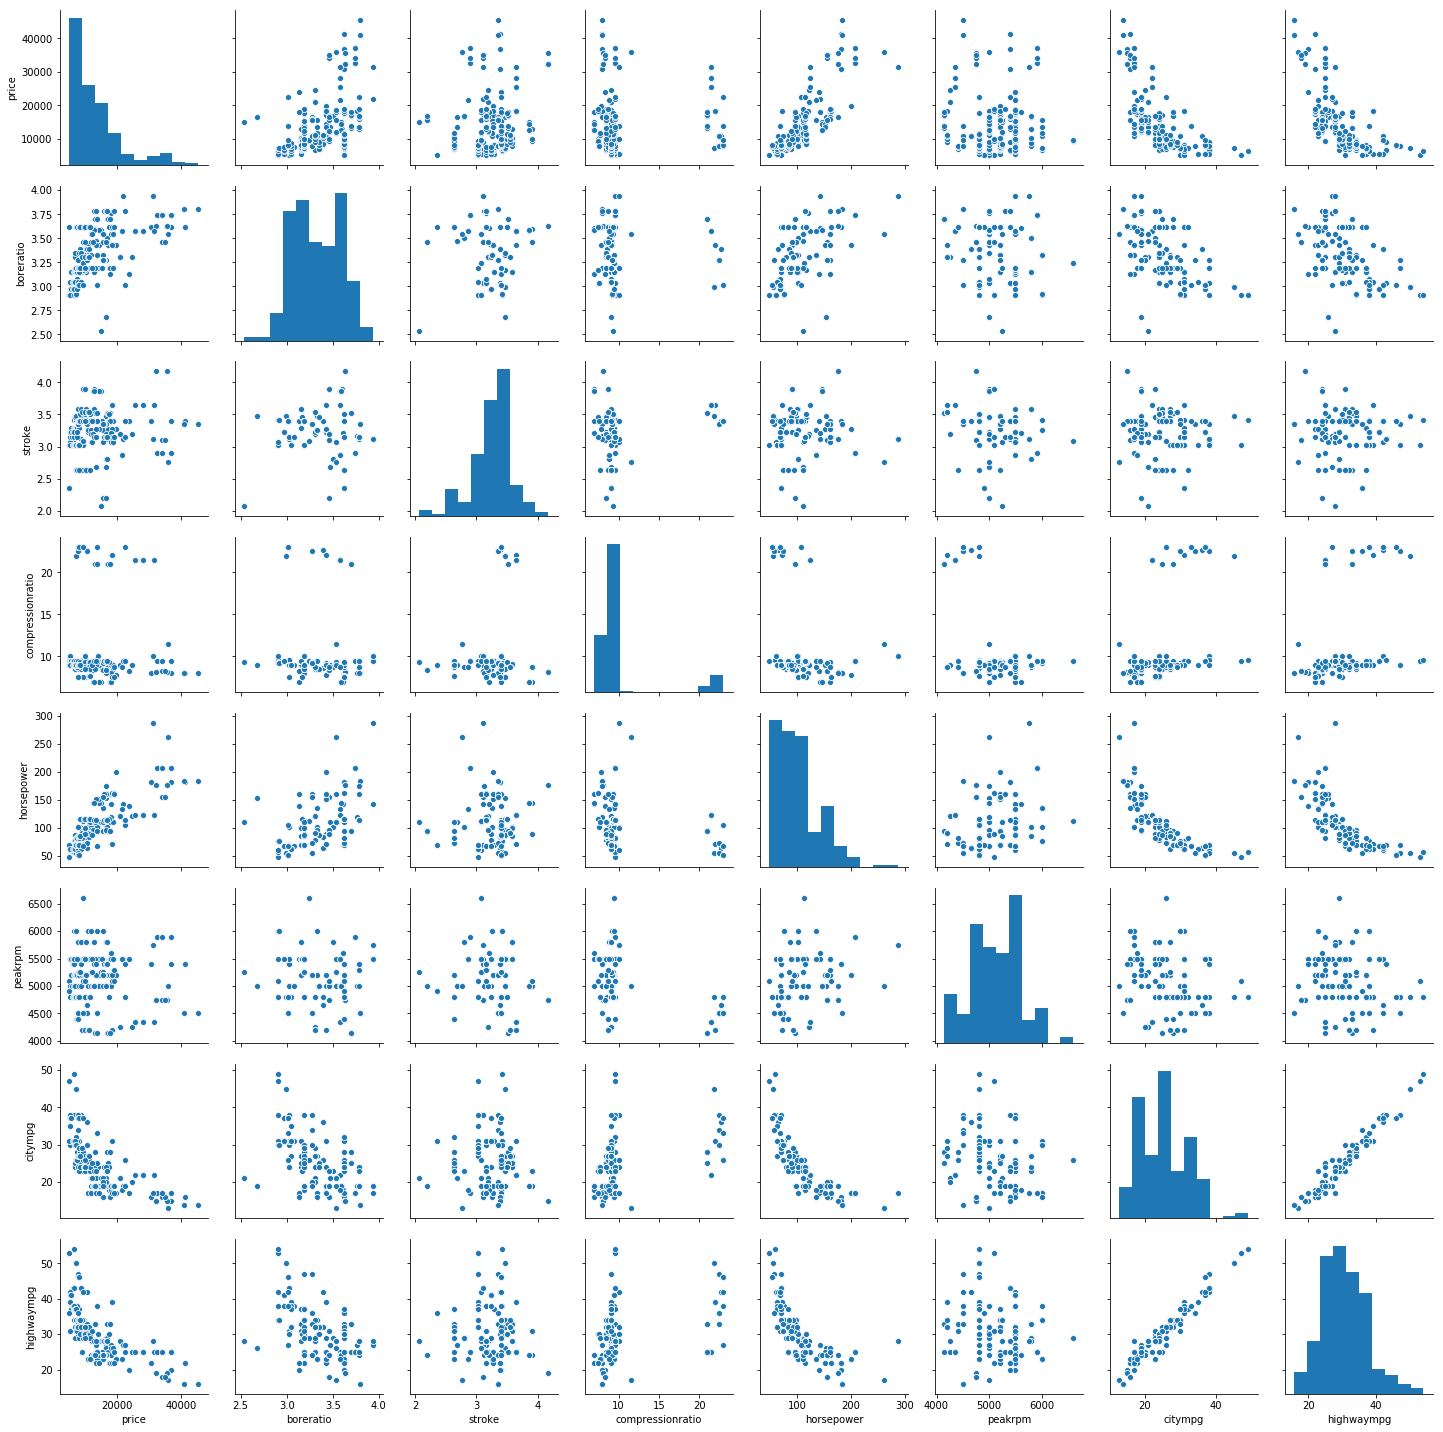

In [13]:
sns.pairplot(data = car_master_df, vars=['price', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg', 'highwaympg'] )

#### Visualising Categorical Variables

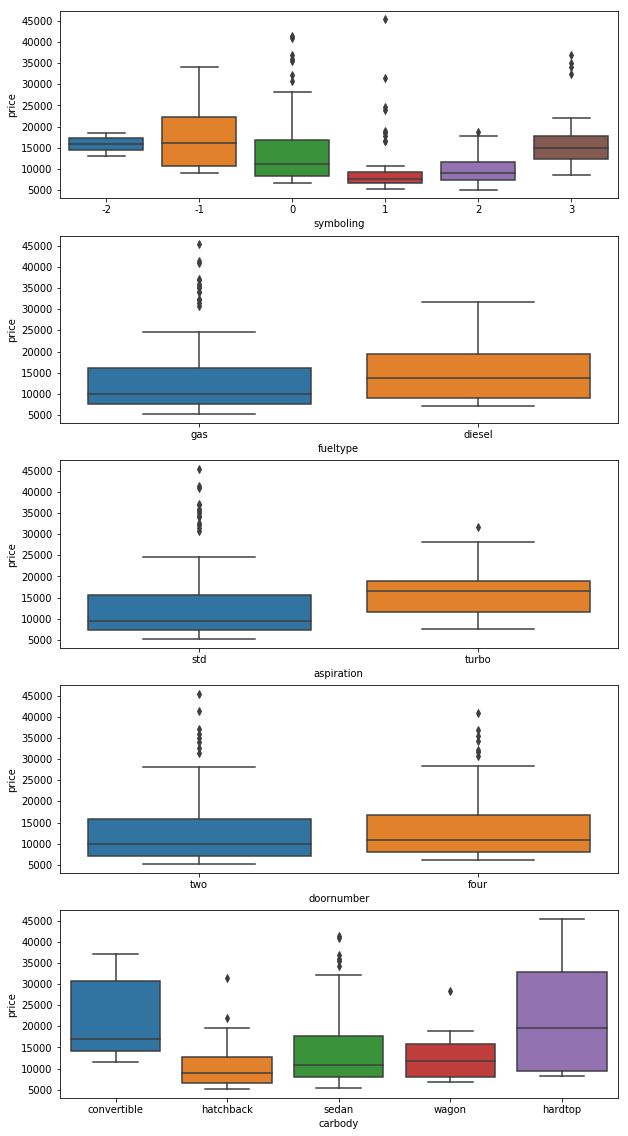

In [14]:
plt.figure(figsize=(10, 20))
plt.subplot(5,1,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_master_df)
plt.subplot(5,1,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_master_df)
plt.subplot(5,1,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_master_df)
plt.subplot(5,1,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_master_df)
plt.subplot(5,1,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_master_df)

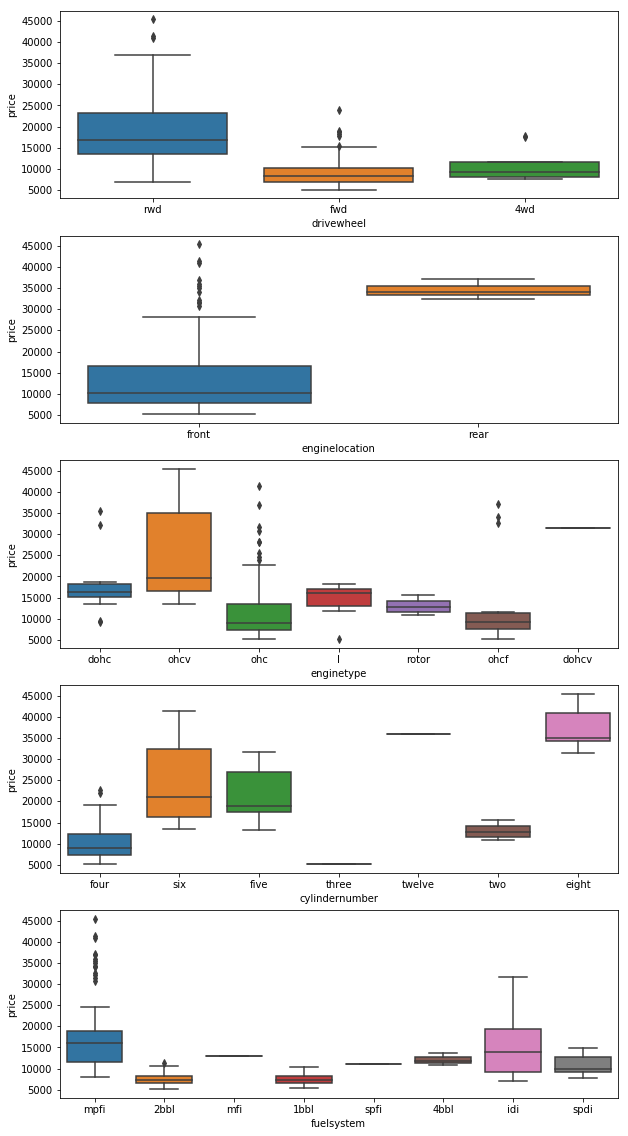

In [15]:
plt.figure(figsize=(10, 20))
plt.subplot(5,1,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_master_df)
plt.subplot(5,1,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_master_df)
plt.subplot(5,1,3)
sns.boxplot(x = 'enginetype', y = 'price', data = car_master_df)
plt.subplot(5,1,4)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_master_df)
plt.subplot(5,1,5)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_master_df)

### Step 3: Data Preparation

#### Converting categorical data 

In [16]:
cylinderNumDict={"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"zero":0,"eleven":11,"twelve":12}
car_master_df['cylindernumber'] = car_master_df['cylindernumber'].str.lower().replace(cylinderNumDict)

##### Converting values in 'cylindernumber' to numeric

In [17]:
car_master_df['cylindernumber'] = pd.to_numeric(car_master_df['cylindernumber'])

In [18]:
doorNumberDic={"two":2,"four":4}
car_master_df['doornumber'] = car_master_df['doornumber'].str.lower().replace(doorNumberDic)

In [19]:
car_master_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,compname
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Converting categorical data (n levels)

In [20]:
multiCatFeatures = ['carbody','drivewheel','enginetype','fuelsystem','enginelocation','aspiration','fueltype','compname']
car_master_df = pd.get_dummies(columns=multiCatFeatures, data=car_master_df)

In [21]:
car_master_df.shape

(205, 70)

In [22]:
car_master_df.head(15)

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,fueltype_diesel,fueltype_gas,compname_alfa-romero,compname_audi,compname_bmw,compname_buick,compname_chevrolet,compname_dodge,compname_honda,compname_isuzu,compname_jaguar,compname_mazda,compname_mercury,compname_mitsubishi,compname_nissan,compname_peugeot,compname_plymouth,compname_porsche,compname_renault,compname_saab,compname_subaru,compname_toyota,compname_volkswagen,compname_volvo
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,2,audi fox,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,1,audi 100ls,4,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.40,8.5,110,5500,19,25,17710.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,1,audi 5000,4,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,1,audi 4000,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.40,8.3,140,5500,17,20,23875.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,0,audi 5000s (diesel),2,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Creating a working copy
car_working_df = car_master_df

In [24]:
car_working_df = car_working_df.drop(columns=['car_ID', 'CarName'])

In [25]:
car_working_df.shape

(205, 68)

### Step 4: Splitting the Data into Training and Testing Sets

In [26]:
car_working_df.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'enginelocation_front', 'enginelocation_rear',
       'aspiration_std', 'aspiration_turbo', 'fueltype_diesel', 'fueltype_gas',
       'compname_alfa-romero', 'compname_audi', 'compname_bmw',
       'compname_buick', 'compname_chevrolet', 'compname_dodge',
       'c

##### Train:test data split : 70 :30

In [27]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_working_df_train, car_working_df_test = train_test_split(car_working_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
car_working_df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,fueltype_diesel,fueltype_gas,compname_alfa-romero,compname_audi,compname_bmw,compname_buick,compname_chevrolet,compname_dodge,compname_honda,compname_isuzu,compname_jaguar,compname_mazda,compname_mercury,compname_mitsubishi,compname_nissan,compname_peugeot,compname_plymouth,compname_porsche,compname_renault,compname_saab,compname_subaru,compname_toyota,compname_volkswagen,compname_volvo
122,1,4,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,5500,31,38,7609.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,3,2,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,5500,19,27,22018.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,2,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,6600,26,29,9538.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,-1,4,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,5100,17,22,18950.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Feature scaling

In [29]:
car_working_df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,fueltype_diesel,fueltype_gas,compname_alfa-romero,compname_audi,compname_bmw,compname_buick,compname_chevrolet,compname_dodge,compname_honda,compname_isuzu,compname_jaguar,compname_mazda,compname_mercury,compname_mitsubishi,compname_nissan,compname_peugeot,compname_plymouth,compname_porsche,compname_renault,compname_saab,compname_subaru,compname_toyota,compname_volkswagen,compname_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,3.118881,98.523077,173.416783,65.839860,53.551748,2539.510490,4.405594,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322,0.027972,0.020979,0.342657,0.475524,0.132867,0.055944,0.594406,0.349650,0.069930,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.993007,0.006993,0.818182,0.181818,0.090909,0.909091,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.195999,0.996399,5.961835,12.598122,2.214203,2.433766,544.650539,1.158178,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883,0.165472,0.143818,0.476266,0.501156,0.340624,0.230621,0.492733,0.478536,0.255926,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.083624,0.083624,0.387050,0.387050,0.288490,0.288490,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,4.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000

In [30]:
scaler = MinMaxScaler()

In [31]:
feature_scale_list = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','price','peakrpm','citympg','highwaympg']
car_working_df_train[feature_scale_list] =  scaler.fit_transform(car_working_df_train[feature_scale_list])
car_working_df_train.head()

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,fueltype_diesel,fueltype_gas,compname_alfa-romero,compname_audi,compname_bmw,compname_buick,compname_chevrolet,compname_dodge,compname_honda,compname_isuzu,compname_jaguar,compname_mazda,compname_mercury,compname_mitsubishi,compname_nissan,compname_peugeot,compname_plymouth,compname_porsche,compname_renault,compname_saab,compname_subaru,compname_toyota,compname_volkswagen,compname_volvo
122,1,4,0.244828,0.426016,0.291667,0.265487,0.272692,4,0.139623,2.97,3.23,9.4,68,0.551020,0.500000,0.567568,0.068818,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,3,2,0.272414,0.452033,0.666667,0.212389,0.500388,4,0.339623,3.94,3.11,9.5,143,0.551020,0.166667,0.270270,0.466890,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,2,0.272414,0.448780,0.308333,0.424779,0.314973,4,0.139623,3.24,3.08,9.4,112,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,0.068966,0.450407,0.316667,0.088496,0.411171,4,0.260377,3.47,2.68,9.0,111,0.346939,0.222222,0.270270,0.314446,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,-1,4,0.610345,0.775610,0.575000,0.858407,0.647401,4,0.260377,3.62,3.15,7.5,162,0.387755,0.111111,0.135135,0.382131,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
car_working_df_train.corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,fueltype_diesel,fueltype_gas,compname_alfa-romero,compname_audi,compname_bmw,compname_buick,compname_chevrolet,compname_dodge,compname_honda,compname_isuzu,compname_jaguar,compname_mazda,compname_mercury,compname_mitsubishi,compname_nissan,compname_peugeot,compname_plymouth,compname_porsche,compname_renault,compname_saab,compname_subaru,compname_toyota,compname_volkswagen,compname_volvo
symboling,1.000000,-0.659214,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.179149,-0.182393,-0.132768,-0.028788,-0.266962,0.038395,0.343449,-0.042737,0.022248,-0.129859,0.313538,0.188676,0.431934,-0.378439,-0.279121,-0.111768,0.122342,-0.072106,0.115680,0.014279,-0.125030,-0.064765,-0.054312,-0.028385,0.313538,-0.060705,0.001721,0.270560,-0.272756,NaN,0.020993,0.211203,NaN,-0.155104,0.155104,1.023416e-01,-1.023416e-01,-0.272756,0.272756,0.188676,0.064332,-0.052187,-0.159266,0.024909,0.035610,-0.052546,-0.056975,-0.097917,0.135450,NaN,0.237388,0.056056,-0.162832,0.028865,0.188676,0.020266,0.188676,-1.050166e-01,-0.100556,0.120186,-0.374108
doornumber,-0.659214,1.000000,0.462232,0.436645,0.245854,0.554436,0.251023,0.006743,0.081539,0.183979,-0.014726,0.214898,-0.101487,-0.333523,-0.034440,-0.064721,0.075936,-0.191160,-0.164957,-0.605838,0.450106,0.347369,0.154732,-0.044536,-0.028713,-0.032831,-0.094565,0.171980,-0.025029,0.116173,-0.060031,-0.191160,-0.090439,0.030365,-0.164957,0.231626,NaN,-0.006944,-0.165569,NaN,0.094565,-0.094565,-8.964215e-02,8.964215e-02,0.231626,-0.231626,-0.164957,0.015551,-0.025056,0.092233,-0.066670,-0.095313,-0.118033,0.031617,0.031617,-0.062361,NaN,-0.118033,-0.086841,0.216025,0.065114,-0.164957,-0.014260,0.031617,1.504513e-01,0.032944,0.005478,0.185712
wheelbase,-0.539877,0.462232,1.000000,0.877909,0.796888,0.555524,0.792815,0.353865,0.588600,0.482386,0.224970,0.341651,0.382758,-0.347757,-0.476317,-0.542295,0.622591,-0.184118,-0.103235,-0.371606,0.333352,0.162160,-0.051653,-0.499023,0.538721,0.121707,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032,-0.162286,-0.438523,-0.079417,0.393481,NaN,0.338923,-0.117645,NaN,0.127454,-0.127454,-2.774139e-01,2.774139e-01,0.393481,-0.393481,-0.196046,0.113322,0.172967,0.353620,-0.149230,-0.169896,-0.163380,-0.100771,0.266365,-0.110961,NaN,-0.142053,-0.157336,0.481538,-0.137718,-0.108163,-0.048575,0.014215,-1.013949e-01,-0.004621,-0.026522,0.288038
carlength,-0.390880,0.436645,0.877909,1.000000,0.846307,0.454721,0.881495,0.444725,0.702794,0.620436,0.176814,0.227958,0.564588,-0.301036,-0.674112,-0.704482,0.713749,-0.055629,-0.049558,-0.456829,0.333683,0.195750,-0.004688,-0.549343,0.567900,0.219582,0.015262,0.253571,-0.293690,-0.086593,0.211595,-0.059682,-0.271070,-0.502693,-0.051502,0.275886,NaN,0.501706,-0.094743,NaN,0.030193,-0.030193,-2.349248e-01,2.349248e-01,0.275886,-0.275886,-0.044505,0.152884,0.193647,0.303900,-0.250506,-0.268665,-0.266420,-0.146728,0.274602,-0.078316,NaN,-0.119850,-0.077103,0.346285,-0.150217,-0.026237,0.054390,0.153722,-8.065827e-02,-0.040208,-0.005208,0.256437
carwidth,-0.263917,0.245854,0.796888,0.846307,1.000000,0.245022,0.873884,0.551387,0.754925,0.580962,0.233631,0.249516,0.685051,-0.188153,-0.652871,-0.680451,0.799380,-0.008831,-0.068989,-0.224067,0.222689,0.019073,-0.049908,-0.500816,0.539726,0.098194,0.245699,0.193688,-0.290778,-0.108346,0.305924,-0.010753,-0.156098,-0.551596,-0.009279,0.293054,NaN,0.460851,-0.063850,NaN,0.031943,-0.

In [33]:
car_working_df_train.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'enginelocation_front', 'enginelocation_rear',
       'aspiration_std', 'aspiration_turbo', 'fueltype_diesel', 'fueltype_gas',
       'compname_alfa-romero', 'compname_audi', 'compname_bmw',
       'compname_buick', 'compname_chevrolet', 'compname_dodge',
       'c

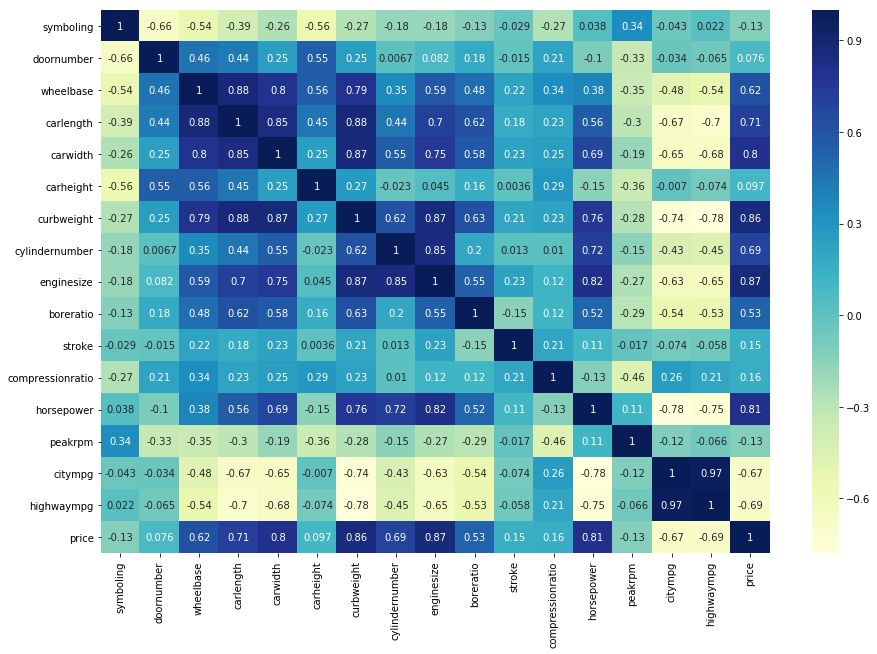

In [34]:
feature_list=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']
plt.figure(figsize = (15, 10))
sns.heatmap(car_working_df_train[feature_list].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [35]:
car_working_df_train.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'enginelocation_front', 'enginelocation_rear',
       'aspiration_std', 'aspiration_turbo', 'fueltype_diesel', 'fueltype_gas',
       'compname_alfa-romero', 'compname_audi', 'compname_bmw',
       'compname_buick', 'compname_chevrolet', 'compname_dodge',
       'c

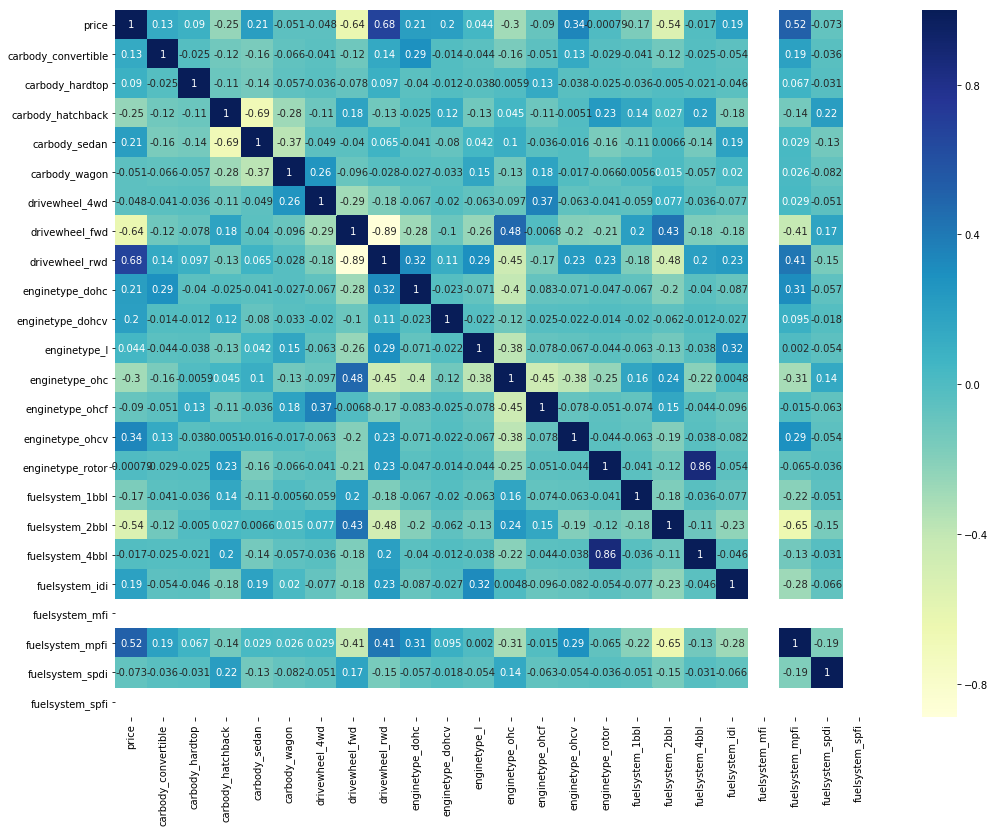

In [36]:
feature_list=['price','carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi']
plt.figure(figsize = (17, 13))
sns.heatmap(car_working_df_train[feature_list].corr(), annot=True, cmap="YlGnBu")
plt.show()

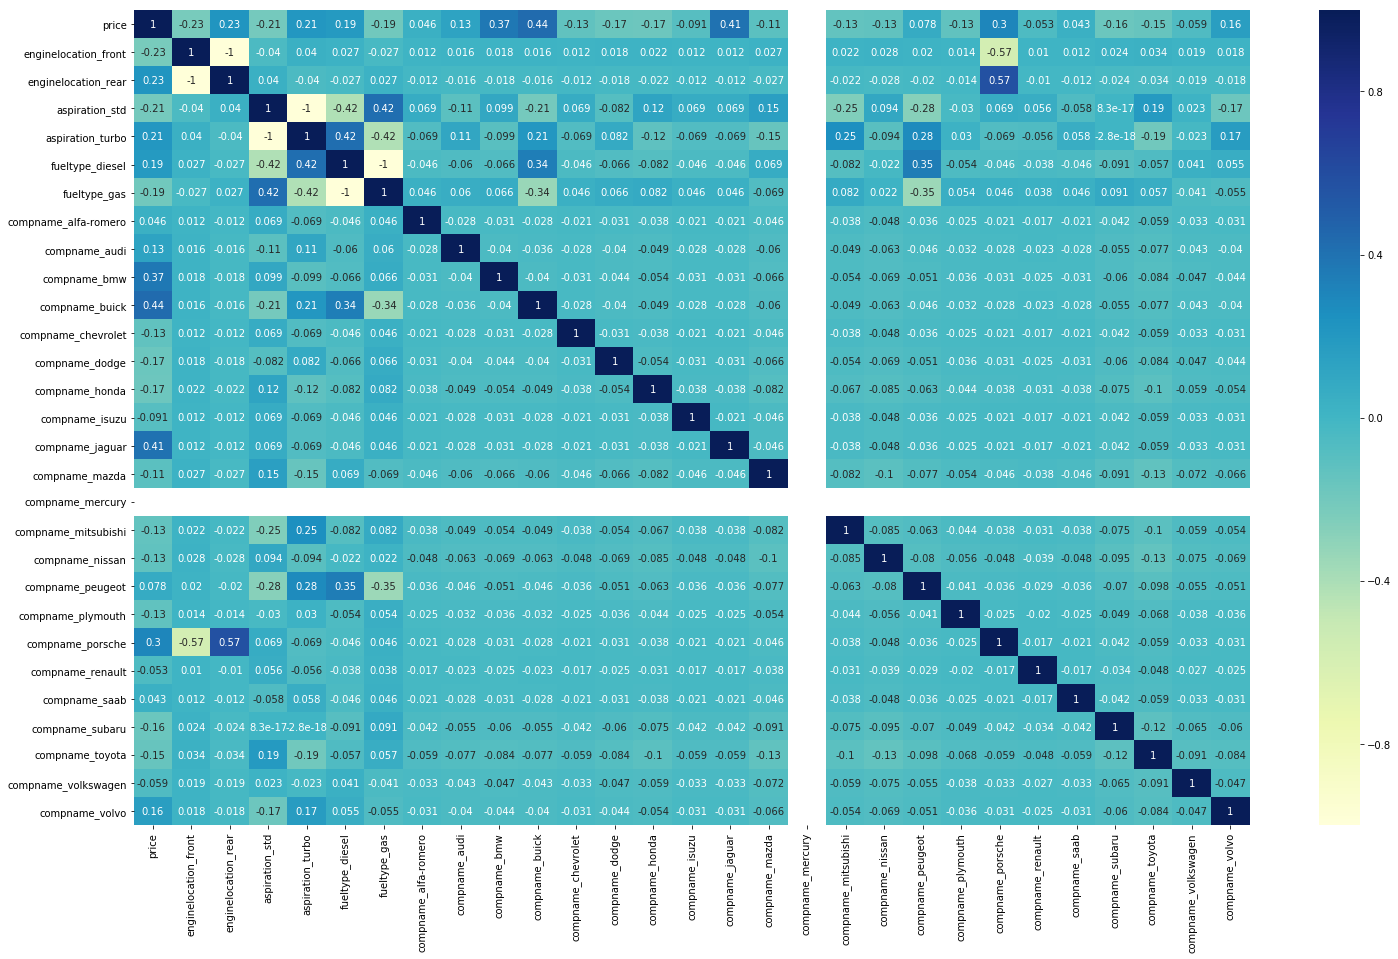

In [37]:
feature_list=['price','enginelocation_front', 'enginelocation_rear',
       'aspiration_std', 'aspiration_turbo', 'fueltype_diesel', 'fueltype_gas',
       'compname_alfa-romero', 'compname_audi', 'compname_bmw',
       'compname_buick', 'compname_chevrolet', 'compname_dodge',
       'compname_honda', 'compname_isuzu', 'compname_jaguar', 'compname_mazda',
       'compname_mercury', 'compname_mitsubishi', 'compname_nissan',
       'compname_peugeot', 'compname_plymouth', 'compname_porsche',
       'compname_renault', 'compname_saab', 'compname_subaru',
       'compname_toyota', 'compname_volkswagen', 'compname_volvo']
plt.figure(figsize = (25, 15))
sns.heatmap(car_working_df_train[feature_list].corr(), annot=True, cmap="YlGnBu")
plt.show()

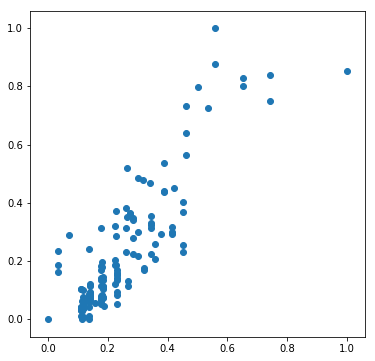

In [38]:
plt.figure(figsize=[6,6])
plt.scatter(car_working_df_train['enginesize'], car_working_df_train['price'])
plt.show()

### Step 5: Building a linear model

#### Using Recursive Feature elimination and then manually adding/dropping features

#### Dividing into X and Y sets for the model building

In [39]:
Y_train = car_working_df_train['price']
X_train = car_working_df_train

In [40]:
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,fueltype_diesel,fueltype_gas,compname_alfa-romero,compname_audi,compname_bmw,compname_buick,compname_chevrolet,compname_dodge,compname_honda,compname_isuzu,compname_jaguar,compname_mazda,compname_mercury,compname_mitsubishi,compname_nissan,compname_peugeot,compname_plymouth,compname_porsche,compname_renault,compname_saab,compname_subaru,compname_toyota,compname_volkswagen,compname_volvo
122,1,4,0.244828,0.426016,0.291667,0.265487,0.272692,4,0.139623,2.97,3.23,9.4,68,0.551020,0.500000,0.567568,0.068818,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,3,2,0.272414,0.452033,0.666667,0.212389,0.500388,4,0.339623,3.94,3.11,9.5,143,0.551020,0.166667,0.270270,0.466890,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,2,0.272414,0.448780,0.308333,0.424779,0.314973,4,0.139623,3.24,3.08,9.4,112,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,0.068966,0.450407,0.316667,0.088496,0.411171,4,0.260377,3.47,2.68,9.0,111,0.346939,0.222222,0.270270,0.314446,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,-1,4,0.610345,0.775610,0.575000,0.858407,0.647401,4,0.260377,3.62,3.15,7.5,162,0.387755,0.111111,0.135135,0.382131,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr, 15)             # running RFE
rfe = rfe.fit(X_train, Y_train)

In [42]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('symboling', False, 53),
 ('doornumber', False, 45),
 ('wheelbase', True, 1),
 ('carlength', False, 5),
 ('carwidth', False, 6),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', False, 39),
 ('enginesize', True, 1),
 ('boreratio', False, 30),
 ('stroke', False, 43),
 ('compressionratio', False, 14),
 ('horsepower', False, 51),
 ('peakrpm', False, 3),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('price', True, 1),
 ('carbody_convertible', False, 11),
 ('carbody_hardtop', False, 7),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_4wd', False, 29),
 ('drivewheel_fwd', False, 25),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohc', False, 17),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 10),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 23),
 ('enginetype_ohcv', False, 48),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_1bbl', False, 20),
 ('fuelsystem_2bbl', False, 27),
 ('fuels

In [43]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [44]:
sel_col_list = X_train.columns[rfe.support_]
sel_col_list

Index(['wheelbase', 'carheight', 'curbweight', 'enginesize', 'citympg',
       'highwaympg', 'price', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_rotor', 'compname_alfa-romero', 'compname_honda'],
      dtype='object')

In [45]:
X_train_rfe = X_train[sel_col_list]
X_train_rfe = X_train_rfe.drop(columns='price')
X_train_rfe.head()

,wheelbase,carheight,curbweight,enginesize,citympg,highwaympg,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_ohc,enginetype_rotor,compname_alfa-romero,compname_honda
122,0.244828,0.265487,0.272692,0.139623,0.500000,0.567568,0,1,0,0,1,0,0,0
125,0.272414,0.212389,0.500388,0.339623,0.166667,0.270270,1,0,0,0,1,0,0,0
166,0.272414,0.424779,0.314973,0.139623,0.361111,0.324324,1,0,0,0,0,0,0,0
1,0.068966,0.088496,0.411171,0.260377,0.222222,0.270270,0,0,0,0,0,0,1,0
199,0.610345,0.858407,0.647401,0.260377,0.111111,0.135135,0,0,1,0,1,0,0,0


#### RFE - Model 1

In [46]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_1 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [47]:
lr_rfe_1.params

const                  -0.085415
wheelbase               0.032600
carheight               0.024663
curbweight              0.381146
enginesize              0.763479
citympg                 0.072620
highwaympg             -0.100509
carbody_hatchback      -0.109258
carbody_sedan          -0.085630
carbody_wagon          -0.133498
enginetype_dohcv        0.236660
enginetype_ohc          0.056517
enginetype_rotor        0.238373
compname_alfa-romero    0.020624
compname_honda          0.002214
dtype: float64

In [48]:
print(lr_rfe_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     51.63
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.12e-45
Time:                        15:38:44   Log-Likelihood:                 152.39
No. Observations:                 143   AIC:                            -274.8
Df Residuals:                     128   BIC:                            -230.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0854 

In [49]:
# For each X, calculate VIF and save in dataframe
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,77.830090,const
1,5.528347,wheelbase
2,2.852587,carheight
3,14.907419,curbweight
4,7.616609,enginesize
5,25.687161,citympg
6,28.297282,highwaympg
7,6.990600,carbody_hatchback
8,7.973313,carbody_sedan
9,4.659072,carbody_wagon


#### RFE - Model 2

##### Dropping column 'compname_honda' due to very high p-value (>0.05)

In [50]:
X_train_rfe = X_train_rfe.drop(columns='compname_honda')
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_2 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [51]:
lr_rfe_2.params

const                  -0.085305
wheelbase               0.032419
carheight               0.024901
curbweight              0.380170
enginesize              0.764335
citympg                 0.075074
highwaympg             -0.103031
carbody_hatchback      -0.109037
carbody_sedan          -0.085515
carbody_wagon          -0.133333
enginetype_dohcv        0.237075
enginetype_ohc          0.056681
enginetype_rotor        0.238525
compname_alfa-romero    0.020767
dtype: float64

In [52]:
print(lr_rfe_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     56.04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.47e-46
Time:                        15:38:44   Log-Likelihood:                 152.38
No. Observations:                 143   AIC:                            -276.8
Df Residuals:                     129   BIC:                            -235.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0853 

#### RFE - Model 3

##### Dropping column 'compname_alfa-romero' due to very high p-value (>0.05)

In [53]:
X_train_rfe = X_train_rfe.drop(columns='compname_alfa-romero')
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_3 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [54]:
lr_rfe_3.params

const               -0.078170
wheelbase            0.027428
carheight            0.023170
curbweight           0.388894
enginesize           0.755623
citympg              0.068853
highwaympg          -0.097375
carbody_hatchback   -0.113360
carbody_sedan       -0.089704
carbody_wagon       -0.138145
enginetype_dohcv     0.234030
enginetype_ohc       0.055289
enginetype_rotor     0.234470
dtype: float64

In [55]:
print(lr_rfe_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     61.11
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.94e-47
Time:                        15:38:45   Log-Likelihood:                 152.32
No. Observations:                 143   AIC:                            -278.6
Df Residuals:                     130   BIC:                            -240.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0782      0.06

#### RFE - Model 4

##### Dropping 'wheelbase' as it has high p-value (>0.05)

In [56]:
X_train_rfe = X_train_rfe.drop(columns='wheelbase')
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_4 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [57]:
lr_rfe_4.params

const               -0.083917
carheight            0.030707
curbweight           0.413492
enginesize           0.749548
citympg              0.079897
highwaympg          -0.106235
carbody_hatchback   -0.109404
carbody_sedan       -0.084924
carbody_wagon       -0.135782
enginetype_dohcv     0.231924
enginetype_ohc       0.055577
enginetype_rotor     0.235029
dtype: float64

In [58]:
print(lr_rfe_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     67.12
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.44e-48
Time:                        15:38:45   Log-Likelihood:                 152.26
No. Observations:                 143   AIC:                            -280.5
Df Residuals:                     131   BIC:                            -245.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0839      0.05

#### RFE - Model 5

##### Adding horsepower as it has high correlation with price

In [59]:
X_train_rfe['horsepower']=X_train['horsepower']
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_5 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [60]:
lr_rfe_5.params

const               -0.304427
carheight            0.076255
curbweight           0.419269
enginesize           0.483608
citympg              0.279199
highwaympg          -0.128790
carbody_hatchback   -0.125167
carbody_sedan       -0.092709
carbody_wagon       -0.144305
enginetype_dohcv     0.012036
enginetype_ohc       0.067731
enginetype_rotor     0.240407
horsepower           0.001973
dtype: float64

In [61]:
print(lr_rfe_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     69.22
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.06e-50
Time:                        15:38:45   Log-Likelihood:                 159.95
No. Observations:                 143   AIC:                            -293.9
Df Residuals:                     130   BIC:                            -255.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3044      0.08

#### RFE - Model 6

##### Adding 'carwidth' and 'enginelocation_rear' as they have high correlation with price

In [62]:
X_train_rfe['carwidth'] = X_train['carwidth']
X_train_rfe['enginelocation_rear']= X_train['enginelocation_rear']
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_6 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [63]:
lr_rfe_6.params

const                 -0.301889
carheight              0.032343
curbweight             0.361366
enginesize             0.460795
citympg                0.311242
highwaympg            -0.186816
carbody_hatchback     -0.092312
carbody_sedan         -0.060452
carbody_wagon         -0.102583
enginetype_dohcv       0.029622
enginetype_ohc         0.066217
enginetype_rotor       0.218344
horsepower             0.001478
carwidth               0.168009
enginelocation_rear    0.314701
dtype: float64

In [64]:
print(lr_rfe_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     66.24
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.42e-51
Time:                        15:38:45   Log-Likelihood:                 167.78
No. Observations:                 143   AIC:                            -305.6
Df Residuals:                     128   BIC:                            -261.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3019    

In [65]:
# For each X, calculate VIF and save in dataframe
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,135.782598,const
1,2.657661,carheight
2,13.960743,curbweight
3,9.499421,enginesize
4,26.365082,citympg
5,27.954911,highwaympg
6,6.771334,carbody_hatchback
7,7.488610,carbody_sedan
8,4.530044,carbody_wagon
9,1.965310,enginetype_dohcv


#### RFE - Model 7

##### Dropping 'carheight','highwaympg','enginetype_dohcv' as they have high p-value (>0.05)

In [66]:
X_train_rfe = X_train_rfe.drop(columns=['carheight','highwaympg','enginetype_dohcv'])
X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_7 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [67]:
lr_rfe_7.params

const                 -0.305982
curbweight             0.403976
enginesize             0.434212
citympg                0.142571
carbody_hatchback     -0.092254
carbody_sedan         -0.057074
carbody_wagon         -0.093375
enginetype_ohc         0.063571
enginetype_rotor       0.204387
horsepower             0.001382
carwidth               0.183295
enginelocation_rear    0.314387
dtype: float64

In [68]:
print(lr_rfe_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     85.05
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.27e-54
Time:                        15:38:45   Log-Likelihood:                 166.88
No. Observations:                 143   AIC:                            -309.8
Df Residuals:                     131   BIC:                            -274.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3060    

In [69]:
# For each X, calculate VIF and save in dataframe
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,96.541683,const
1,11.632650,curbweight
2,8.258398,enginesize
3,3.853173,citympg
4,6.645306,carbody_hatchback
5,6.911062,carbody_sedan
6,4.008225,carbody_wagon
7,1.480114,enginetype_ohc
8,1.598551,enginetype_rotor
9,5.924765,horsepower


#### RFE - Model 8

##### Dropping 'curbweight' as it has high p-value (>0.05)

In [70]:
X_train_rfe_copy = X_train_rfe.copy()
X_train_rfe = X_train_rfe.drop(columns=['curbweight'])

X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_8 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [71]:
lr_rfe_8.params

const                 -0.233561
enginesize             0.715462
citympg                0.047847
carbody_hatchback     -0.095646
carbody_sedan         -0.053834
carbody_wagon         -0.059556
enginetype_ohc         0.050594
enginetype_rotor       0.220583
horsepower             0.001151
carwidth               0.366277
enginelocation_rear    0.286062
dtype: float64

In [72]:
print(lr_rfe_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     83.66
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.85e-52
Time:                        15:38:45   Log-Likelihood:                 159.45
No. Observations:                 143   AIC:                            -296.9
Df Residuals:                     132   BIC:                            -264.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2336    

In [73]:
# For each X, calculate VIF and save in dataframe
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,88.106827,const
1,5.238386,enginesize
2,3.356560,citympg
3,6.641138,carbody_hatchback
4,6.906852,carbody_sedan
5,3.796304,carbody_wagon
6,1.421699,enginetype_ohc
7,1.587080,enginetype_rotor
8,5.790976,horsepower
9,3.026959,carwidth


#### RFE - Model 9

##### Adding back 'curbweight' and removing 'carwidth' as there is a significant drop in Adjusted R-squared

In [74]:
X_train_rfe = X_train_rfe_copy
X_train_rfe = X_train_rfe.drop(columns='carwidth')
X_train_rfe_copy = X_train_rfe.copy()

X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_9 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [75]:
lr_rfe_9.params

const                 -0.305336
curbweight             0.555951
enginesize             0.410038
citympg                0.150773
carbody_hatchback     -0.082236
carbody_sedan         -0.044981
carbody_wagon         -0.092843
enginetype_ohc         0.069500
enginetype_rotor       0.209538
horsepower             0.001495
enginelocation_rear    0.298495
dtype: float64

In [76]:
print(lr_rfe_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     90.01
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           6.04e-54
Time:                        15:38:45   Log-Likelihood:                 163.99
No. Observations:                 143   AIC:                            -306.0
Df Residuals:                     132   BIC:                            -273.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3053    

In [77]:
# For each X, calculate VIF and save in dataframe
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,96.539903,const
1,7.263961,curbweight
2,8.199194,enginesize
3,3.843292,citympg
4,6.548832,carbody_hatchback
5,6.755397,carbody_sedan
6,4.008086,carbody_wagon
7,1.447760,enginetype_ohc
8,1.595471,enginetype_rotor
9,5.838522,horsepower


#### RFE - Model 10

##### Adding 'wheelbase' , 'cylindernumber' as it has high correlation with price

In [78]:
X_train_rfe[['cylindernumber','wheelbase']] = X_train[['cylindernumber','wheelbase']] 

X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_10 = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [79]:
lr_rfe_10.params

const                 -0.369204
curbweight             0.448080
enginesize             0.242743
citympg                0.144110
carbody_hatchback     -0.110999
carbody_sedan         -0.083708
carbody_wagon         -0.128165
enginetype_ohc         0.070794
enginetype_rotor       0.242441
horsepower             0.001600
enginelocation_rear    0.315866
cylindernumber         0.024547
wheelbase              0.152409
dtype: float64

In [80]:
print(lr_rfe_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     78.88
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.36e-53
Time:                        15:38:45   Log-Likelihood:                 168.10
No. Observations:                 143   AIC:                            -310.2
Df Residuals:                     130   BIC:                            -271.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3692    

In [81]:
# For each X, calculate VIF and save in dataframe
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,120.974793,const
1,15.847021,curbweight
2,14.492313,enginesize
3,3.883620,citympg
4,7.355769,carbody_hatchback
5,8.262717,carbody_sedan
6,4.463334,carbody_wagon
7,1.451799,enginetype_ohc
8,1.709807,enginetype_rotor
9,7.348998,horsepower


#### RFE - Model 11

##### Dropping 'wheelbase' as it has high correlation with'curbweight'

In [82]:
X_train_rfe_copy = X_train_rfe.copy()
X_train_rfe=X_train_rfe.drop(columns='wheelbase')


X_train_rfe = sm.add_constant(X_train_rfe)
lr_rfe_11 = sm.OLS(Y_train,X_train_rfe).fit()

In [83]:
lr_rfe_11.params

const                 -0.362588
curbweight             0.624104
enginesize             0.221429
citympg                0.138940
carbody_hatchback     -0.084782
carbody_sedan         -0.049947
carbody_wagon         -0.103672
enginetype_ohc         0.071075
enginetype_rotor       0.231627
horsepower             0.001266
enginelocation_rear    0.322167
cylindernumber         0.023921
dtype: float64

In [84]:
print(lr_rfe_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     83.39
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.31e-53
Time:                        15:38:45   Log-Likelihood:                 165.65
No. Observations:                 143   AIC:                            -307.3
Df Residuals:                     131   BIC:                            -271.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3626    

In [85]:
# For each X, calculate VIF and save in dataframe
vif_rfe = pd.DataFrame()
vif_rfe["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe["features"] = X_train_rfe.columns
vif_rfe

,VIF Factor,features
0,120.749685,const
1,8.784551,curbweight
2,14.436851,enginesize
3,3.878888,citympg
4,6.559619,carbody_hatchback
5,6.800831,carbody_sedan
6,4.107878,carbody_wagon
7,1.451712,enginetype_ohc
8,1.693457,enginetype_rotor
9,6.447733,horsepower


In [86]:
X_train_rfe.columns

Index(['const', 'curbweight', 'enginesize', 'citympg', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_ohc', 'enginetype_rotor',
       'horsepower', 'enginelocation_rear', 'cylindernumber'],
      dtype='object')

### Step 7: Residual Analysis of the train data

In [87]:
Y_train_price = lr_rfe_11.predict(X_train_rfe)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

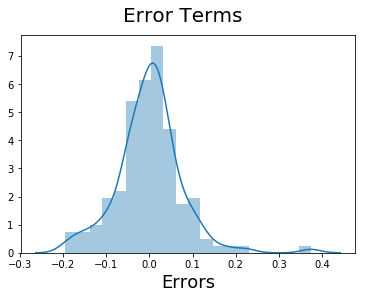

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

### Step 8: Making Predictions Using the Final Model

##### Applying the scaling on the test sets

In [89]:
feature_scale_list = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','price','peakrpm','citympg','highwaympg']
car_working_df_test[feature_scale_list] =  scaler.fit_transform(car_working_df_test[feature_scale_list])
car_working_df_test.head()

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,fueltype_diesel,fueltype_gas,compname_alfa-romero,compname_audi,compname_bmw,compname_buick,compname_chevrolet,compname_dodge,compname_honda,compname_isuzu,compname_jaguar,compname_mazda,compname_mercury,compname_mitsubishi,compname_nissan,compname_peugeot,compname_plymouth,compname_porsche,compname_renault,compname_saab,compname_subaru,compname_toyota,compname_volkswagen,compname_volvo
160,0,4,0.265306,0.341732,0.200000,0.346154,0.132148,4,0.082969,3.19,3.03,9.0,70,0.265306,1.000000,1.000000,0.058474,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,2,4,0.311953,0.426772,0.315789,0.605769,0.219125,4,0.131004,3.19,3.40,9.0,85,0.448980,0.541667,0.580645,0.077398,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,1,2,0.355685,0.522835,0.421053,0.413462,0.271985,4,0.187773,3.39,3.39,8.6,84,0.265306,0.500000,0.516129,0.086148,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,1,2,0.230321,0.379528,0.157895,0.307692,0.214320,4,0.082969,3.24,3.08,9.4,112,1.000000,0.500000,0.419355,0.097473,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,2,2,0.195335,0.200000,0.136842,0.605769,0.202307,4,0.126638,3.62,2.64,8.7,73,0.102041,0.500000,0.483871,0.055099,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##### Dividing into X_test and y_test

In [90]:
Y_test = car_working_df_test.pop('price')
X_test = car_working_df_test

In [91]:
X_test_lr_rfe_11 = X_test[['curbweight', 'enginesize', 'citympg', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_ohc', 'enginetype_rotor',
       'horsepower', 'enginelocation_rear', 'cylindernumber']]
X_test_lr_rfe_11 = sm.add_constant(X_test_lr_rfe_11)

In [92]:
Y_pred_lr_rfe_11 = lr_rfe_11.predict(X_test_lr_rfe_11)

### Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

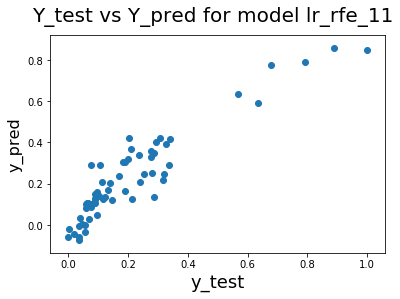

In [93]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_pred_lr_rfe_11)
fig.suptitle('Y_test vs Y_pred for model lr_rfe_11', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

### Conclusion
We can see that the equation of our best fitted line is:

$ price = -0.3626 + 0.6241  \times  curbweight  + 0.2214  \times  enginesize +  0.1389 \times citympg - 0.0848 \times  carbody\_hatchback - 0.0499 \times carbody\_sedan   - 0.1037  \times carbody\_wagon + 0.0711 \times enginetype\_ohc + 0.2316 \times enginetype\_rotor   + 0.0013 \times horsepower + 0.3222 \times enginelocation\_rear + 0.0239 \times cylindernumber $


#### Final model - lr_rfe_11 , Adjusted R-squared: 0.865
##### Predictors: 
<ul>
    <li>curbweight</li>
    <li>enginesize</li>
    <li>citympg</li>
    <li>carbody_hatchback</li>
    <li>carbody_sedan</li>
    <li>carbody_wagon</li>
    <li>enginetype_ohc</li>
    <li>enginetype_rotor</li> 
    <li>horsepower</li>
    <li>enginelocation_rear</li>
    <li>cylindernumber</li>
</ul>